In [678]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [679]:
df = pd.read_excel('data/monthly_avg.xlsx', parse_dates=['Date'], index_col='Date')
df.index = df.index.strftime('%m.%Y')
df = df.round(4)
df

,CHF,EUR,GPB,USD,AUD,UAH,NOK
Date,,,,,,,
06.2023,4.5448,4.4437,5.1751,4.0777,2.7129,0.1106,0.3779
07.2023,4.5988,4.4429,5.1749,4.0190,2.7063,0.1090,0.3913
08.2023,4.6529,4.4598,5.1946,4.0880,2.6514,0.1108,0.3908
09.2023,4.7908,4.5977,5.3353,4.3033,2.7645,0.1166,0.4013
10.2023,4.7249,4.5133,5.1986,4.2708,2.7136,0.1169,0.3886
11.2023,4.5668,4.3997,5.0545,4.0690,2.6442,0.1125,0.3729
12.2023,4.5883,4.3321,5.0269,3.9733,2.6552,0.1070,0.3758
01.2024,4.6625,4.3651,5.0839,4.0020,2.6600,0.1057,0.3849
02.2024,4.5747,4.3275,5.0646,4.0103,2.6177,0.1055,0.3800


In [680]:
#INVESTMENT_ANALYSIS_PLN_10000_(06.2023-06.2024):

In [681]:
## In this example investment, it is assumed that buying and selling were done at the market rate, 
## with an initial investment of 10,000 PLN.

In [682]:
returns = df.pct_change().dropna()
initial_investment = 10000
final_values = ((1 + returns).cumprod().iloc[-1])*initial_investment
investment_returns = ((final_values / initial_investment)-1) * 100
investment_risk = returns.std() * 100

investment_analysis = pd.DataFrame({
    'Final Value': final_values,
    'Return (%)': investment_returns,
    'Risk (%)': investment_risk
}).round(4)
investment_analysis

,Final Value,Return (%),Risk (%)
CHF,9885.5835,-1.1442,2.1404
EUR,9731.7551,-2.6824,1.4808
GPB,9870.9204,-1.2908,1.6118
USD,9839.3702,-1.6063,2.4855
AUD,9814.2209,-1.8578,1.8614
UAH,8969.2586,-10.3074,2.6529
NOK,10005.2924,0.0529,2.4390


In [683]:
investment_analysis.to_excel('data/investment_analysis.xlsx')

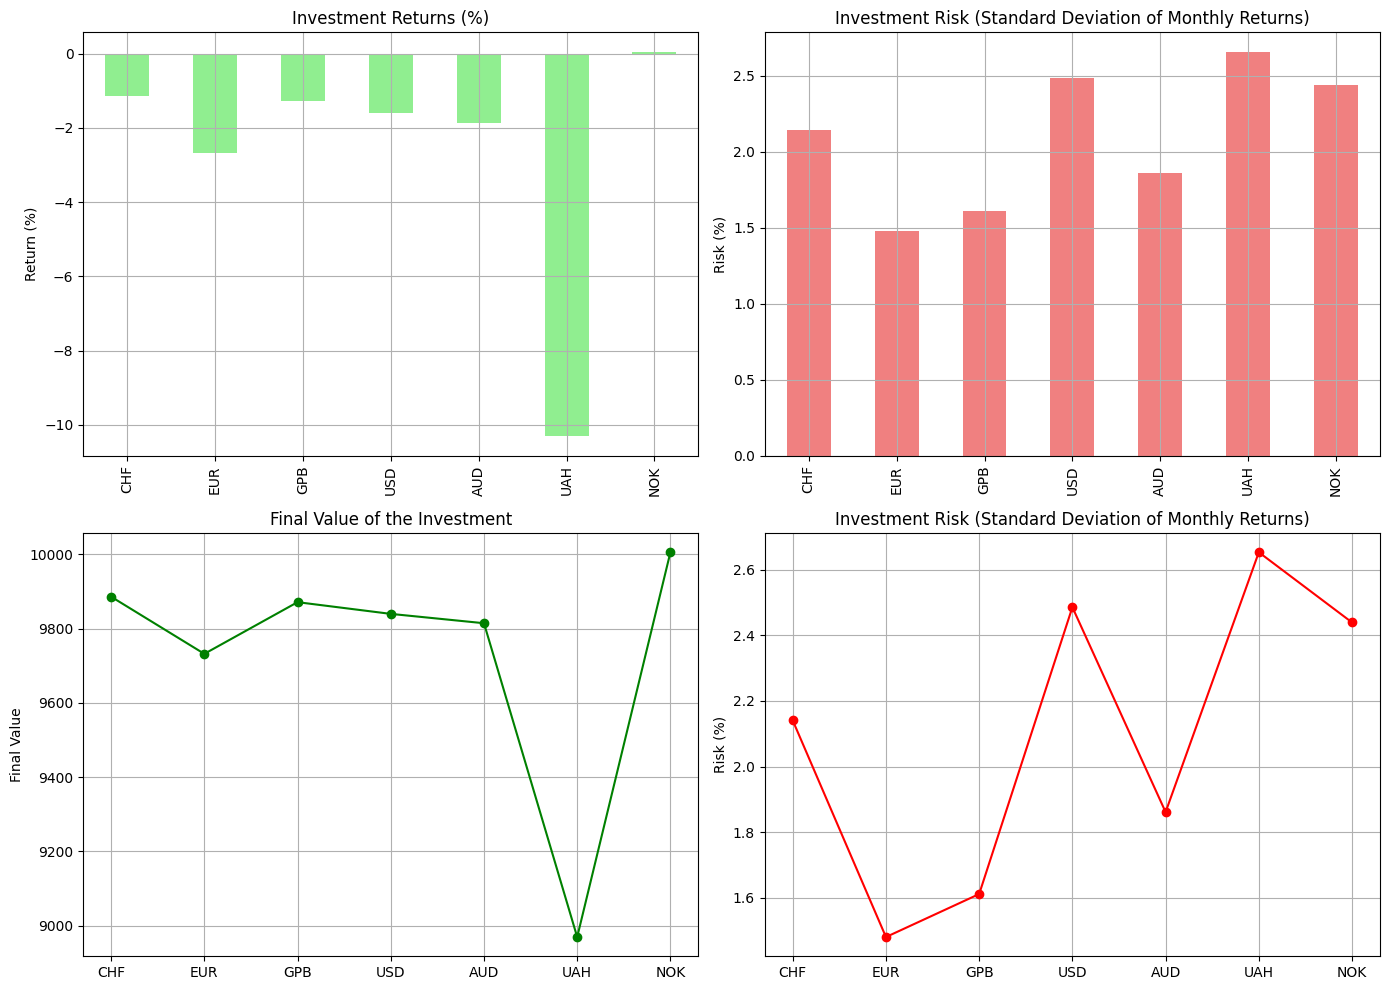

In [684]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
investment_returns.plot(kind='bar', color='lightgreen')
plt.title('Investment Returns (%)')
plt.ylabel('Return (%)')
plt.grid(True)

plt.subplot(2, 2, 2)
investment_risk.plot(kind='bar', color='lightcoral')
plt.title('Investment Risk (Standard Deviation of Monthly Returns)')
plt.ylabel('Risk (%)')
plt.grid(True)

plt.subplot(2, 2, 3) 
final_values.plot(style='-o', color='green')
plt.title('Final Value of the Investment')
plt.ylabel('Final Value')
plt.grid(True)

plt.subplot(2, 2, 4) 
investment_risk.plot(style='-o', color='red')  
plt.title('Investment Risk (Standard Deviation of Monthly Returns)')
plt.ylabel('Risk (%)')
plt.grid(True)

plt.tight_layout()
plt.savefig('data/investment_returns_and_risk.pdf')
plt.show()

In [685]:
# MINIMUM_AND_MAXIMUM_INVESTMENT_ANALYSIS_PLN_10000:

In [686]:
## In this example, monthly analyses were conducted for investments made in the months when the currency exchange rate was at its highest
## and lowest. An initial amount of 10,000 was assumed, with the purchase and sale prices of the currency being the same as the exchange 
## rate value.

In [687]:
high_low = pd.read_excel('data/high_low.xlsx', index_col=0)
percentage_changes = pd.read_excel('data/percent_changes.xlsx', index_col=0)

percentage_changes = percentage_changes.reset_index()

In [688]:
initial_investment = 10000
investment_results = []

for currency in high_low.index:
   
    max_date = high_low.loc[currency, 'max_date']
    max_value = high_low.loc[currency, 'max_value']
    min_date = high_low.loc[currency, 'min_date']
    min_value = high_low.loc[currency, 'min_value']
    
    max_change_row = percentage_changes.loc[percentage_changes['Date'] == max_date, currency]
    min_change_row = percentage_changes.loc[percentage_changes['Date'] == min_date, currency]
    
    if not max_change_row.empty:
        max_change = max_change_row.values[0]
        max_final_value = initial_investment*(1+(max_change / 100))
        max_profit = max_final_value - initial_investment
        max_return = (max_profit / initial_investment)*100
    else:
        max_change = None
        max_final_value = None
        max_profit = None
        max_return = None
    
    if not min_change_row.empty:
        min_change = min_change_row.values[0]
        min_final_value = initial_investment*(1+(min_change / 100))
        min_profit = min_final_value - initial_investment
        min_return = (min_profit / initial_investment)*100
    else:
        min_change = None
        min_final_value = None
        min_profit = None
        min_return = None
    
    investment_results.append({
        'Currency': currency,
        'Max Rate Month': max_date.strftime('%m.%Y') if isinstance(max_date, pd.Timestamp) else max_date,
        'Max Rate Value': max_value,
        'Max Rate Change (%)': max_change,
        'Final Value (Max Rate)': max_final_value,
        'Max Rate Profit': max_profit,
        'Max Rate Return (%)': max_return,
        'Min Rate Month': min_date.strftime('%m.%Y') if isinstance(min_date, pd.Timestamp) else min_date,
        'Min Rate Value': min_value,
        'Min Rate Change (%)': min_change,
        'Final Value (Min Rate)': min_final_value,
        'Min Rate Profit': min_profit,
        'Min Rate Return (%)': min_return
    })

min_max_investment_analysis = pd.DataFrame(investment_results)
min_max_investment_analysis.set_index('Currency', inplace=True)
min_max_investment_analysis

,Max Rate Month,Max Rate Value,Max Rate Change (%),Final Value (Max Rate),Max Rate Profit,Max Rate Return (%),Min Rate Month,Min Rate Value,Min Rate Change (%),Final Value (Min Rate),Min Rate Profit,Min Rate Return (%)
Currency,,,,,,,,,,,,
CHF,9.2023,4.7908,2.96,10296.0,296.0,2.96,5.2024,4.3533,-1.26,9874.0,-126.0,-1.26
EUR,9.2023,4.5977,3.09,10309.0,309.0,3.09,5.2024,4.2800,-0.53,9947.0,-53.0,-0.53
GPB,9.2023,5.3353,2.71,10271.0,271.0,2.71,5.2024,5.0006,-0.47,9953.0,-47.0,-0.47
USD,9.2023,4.3033,5.27,10527.0,527.0,5.27,5.2024,3.9585,-1.31,9869.0,-131.0,-1.31
AUD,9.2023,2.7645,4.27,10427.0,427.0,4.27,3.2024,2.5975,-0.77,9923.0,-77.0,-0.77
UAH,10.2023,0.1169,0.26,10026.0,26.0,0.26,6.2024,0.0992,-0.30,9970.0,-30.0,-0.30
NOK,9.2023,0.4013,2.69,10269.0,269.0,2.69,4.2024,0.3683,-1.45,9855.0,-145.0,-1.45


In [689]:
min_max_investment_analysis.to_excel('data/min_max_investment_analysis.xlsx')

<Figure size 1200x600 with 0 Axes>

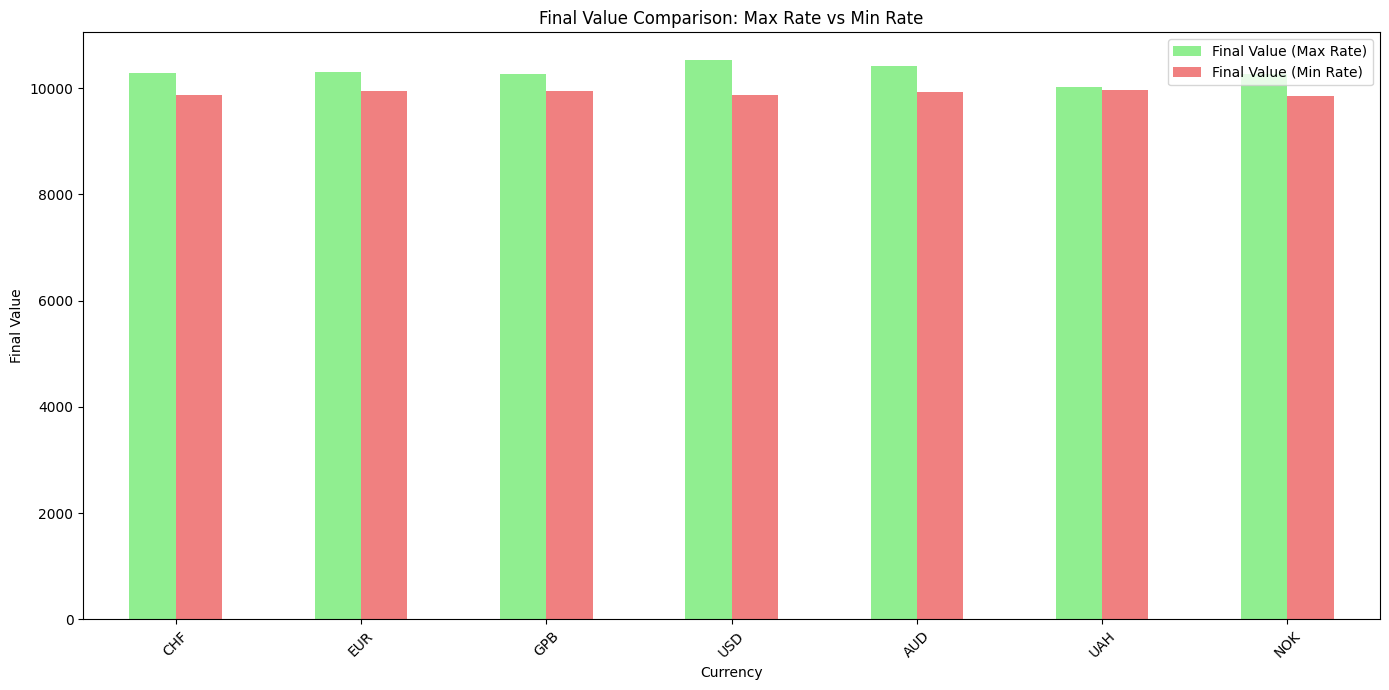

<Figure size 1200x600 with 0 Axes>

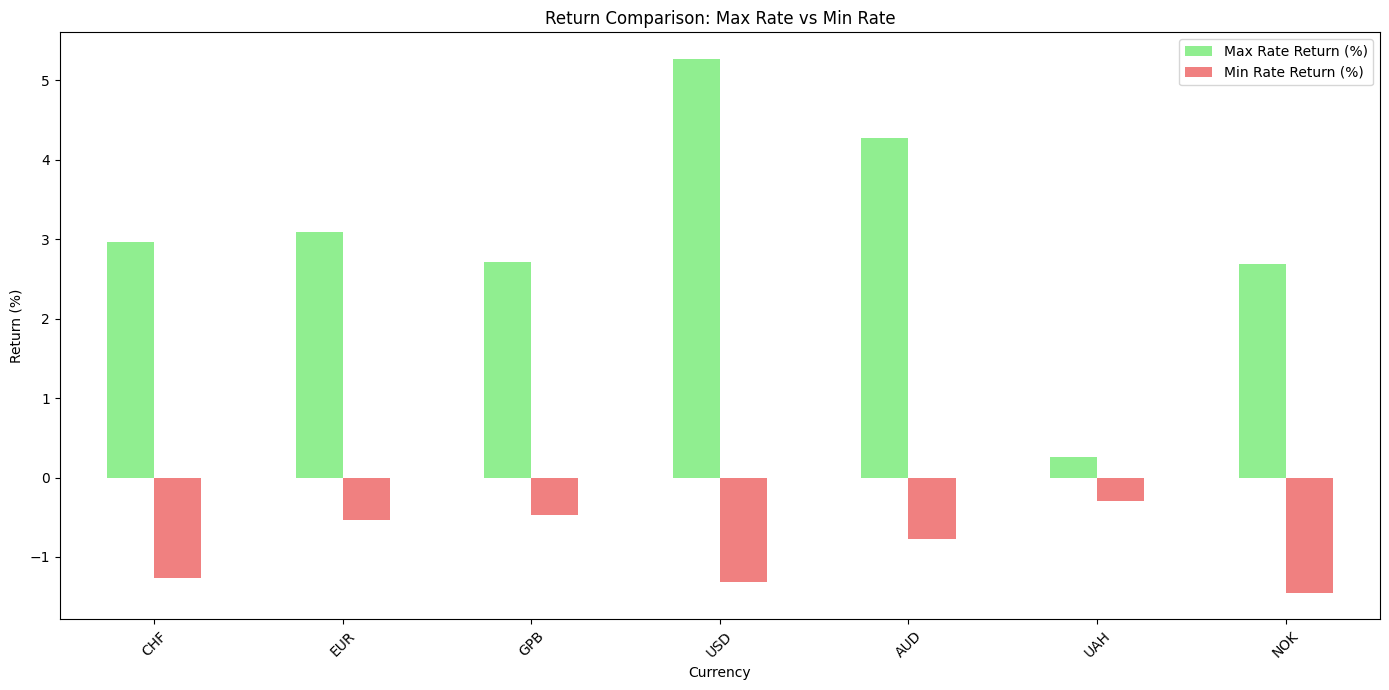

In [690]:
plt.figure(figsize=(12, 6))
ax = min_max_investment_analysis[['Final Value (Max Rate)', 'Final Value (Min Rate)']].plot(kind='bar', color=['lightgreen', 'lightcoral'], figsize=(14, 7))
plt.title('Final Value Comparison: Max Rate vs Min Rate')
plt.xlabel('Currency')
plt.ylabel('Final Value')
plt.xticks(rotation=45)
plt.legend(['Final Value (Max Rate)', 'Final Value (Min Rate)'])

plt.tight_layout()
plt.savefig('data/min_max_final_value_comparison.pdf')
plt.show()

plt.figure(figsize=(12, 6))
ax = min_max_investment_analysis[['Max Rate Return (%)', 'Min Rate Return (%)']].plot(kind='bar', color=['lightgreen', 'lightcoral'], figsize=(14, 7))
plt.title('Return Comparison: Max Rate vs Min Rate')
plt.xlabel('Currency')
plt.ylabel('Return (%)')
plt.xticks(rotation=45)
plt.legend(['Max Rate Return (%)', 'Min Rate Return (%)'])

plt.tight_layout()
plt.savefig('data/min_max_return_comparison.pdf')
plt.show()

In [691]:
#

In [692]:
##

In [693]:
monthly_avg = pd.read_excel('data/monthly_avg.xlsx', index_col='Date')
percent_changes = pd.read_excel('data/percent_changes.xlsx', index_col='Date')

In [694]:
initial_amount = 10000

investment_values = initial_amount * (1+(percent_changes / 100)).cumprod()

investment_profits = investment_values - initial_amount

average_monthly_profit = investment_profits.mean(axis=1)
monthly_profit_std_dev = investment_profits.std(axis=1)

best_investment_currency = percent_changes.idxmax(axis=1)
best_investment_value = percent_changes.max(axis=1)

monthly_investment_analysis = pd.DataFrame({
    'Best Investment Currency': best_investment_currency,
    'Percent Change': best_investment_value,
    'End Value': investment_values.max(axis=1),
    'Profit': investment_profits.max(axis=1),
    'Average Monthly Profit': average_monthly_profit,
    'Profit Std Dev (Risk)': monthly_profit_std_dev
})
monthly_investment_analysis[['End Value', 'Profit', 'Average Monthly Profit',
                             'Profit Std Dev (Risk)']] = monthly_investment_analysis[['End Value', 'Profit', 'Average Monthly Profit',
                                                                                      'Profit Std Dev (Risk)']].round(4)

monthly_investment_analysis

,Best Investment Currency,Percent Change,End Value,Profit,Average Monthly Profit,Profit Std Dev (Risk)
Date,,,,,,
7.2023,NOK,3.55,10355.0000,355.0000,22.7143,172.6825
8.2023,USD,1.72,10341.5385,341.5385,67.2219,181.1365
9.2023,USD,5.27,10619.7259,619.7259,443.3619,159.9960
10.2023,UAH,0.26,10568.9363,568.9363,275.4086,216.4199
11.2023,EUR,-2.52,10171.5443,171.5443,-74.1381,152.0948
12.2023,NOK,0.78,10094.9475,94.9475,-184.5552,150.4580
1.2024,NOK,2.42,10258.4856,258.4856,-104.7283,243.6442
2.2024,USD,0.21,10065.6261,65.6261,-190.0829,196.6109
3.2024,EUR,-0.46,9890.0114,-109.9886,-332.1670,208.8207


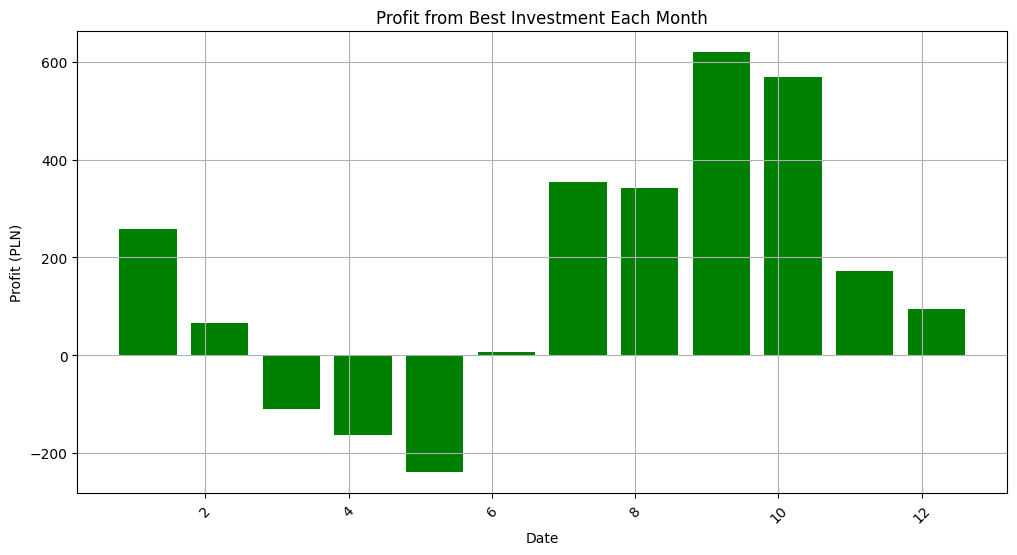

In [695]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_investment_analysis.index, monthly_investment_analysis['Profit'], color='g')
plt.title('Profit from Best Investment Each Month')
plt.xlabel('Date')
plt.ylabel('Profit (PLN)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()